# Linear Regression

## learning objectives

- Implement multiple linear regression model to solve a practical problem
- Calculate evaluation metrics for our model


## What is linear regression?

A linear regression model captures the relationship between input variables and a numerical output. If there is only one input variable, then the task is referred to as simple linear regression.  In cases with more than one input variable, then it is referred to as multiple linear regression.  

 In **regression**, it’s **tough to get exact predictions**, because you have **continuous outputs**.
 You can use coefficient values in the following equation to **make predictions**:

\begin{equation}
y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + b
\end{equation}

* <em>m</em><sub>1</sub>, <em>m</em><sub>2</sub>, …, <em>m</em><sub><em>n</em></sub> are the **feature coefficients**
* <em>b</em> is the **intercept**
* <em>x</em><sub>1</sub>, <em>x</em><sub>2</sub>, …, <em>x</em><sub><em>n</em></sub> are **feature values** (the **independent variables**)
* <em>y</em> is the **predicted value** (the **dependent variable**)

linear regression is an example of supervised learning

# Interactive simulation

- https://setosa.io/ev/ordinary-least-squares-regression

## Predicting miles per gallon (mpg) from car engine data



The goal of this notebook is to use car data (i.e. cylinders, displacement, horsepower, weight) to estimate the average miles per gallon (mpg).

### Importing Python libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries
from sklearn.model_selection import train_test_split # splits for training data and testing data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Accessing dataset

In [2]:
df_all = pd.read_csv('cars.csv')

### Data Visualization

#### 1. Get statstical and datatype information for the fetched dataframe

In [3]:
df_all.head(3)

mpg  cylinders  displacement horsepower  weight  acceleration  model  \
0  18.0          8         307.0      130.0  3504.0          12.0     70   
1  15.0          8         350.0      165.0  3693.0          11.5     70   
2  18.0          8         318.0      150.0  3436.0          11.0     70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite

let's just focus on a couple features

In [4]:
df=df_all[['cylinders','displacement','weight','mpg']]

we can look at some basic statistics about the features

In [5]:
df.describe().T[['min', 'max']]

min     max
cylinders        3.0     8.0
displacement    68.0   455.0
weight        1613.0  5140.0
mpg              9.0    46.6

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   weight        398 non-null    float64
 3   mpg           398 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


This is a pretty clean dataset with no null values so we won't have a lot of data cleaning, but we want to make sure that the distribution of our variables are fit for analysis. 

let's use a pairplot to examine the relationship between variables

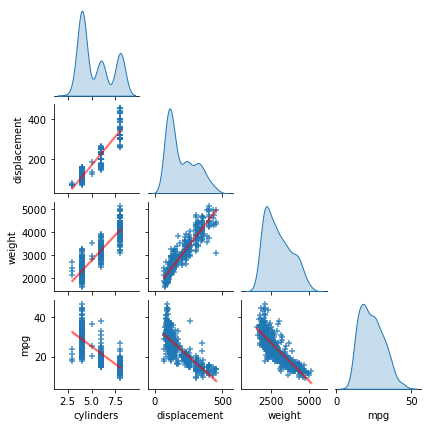

In [7]:
sns.pairplot(df, corner=True, diag_kind='kde', kind='reg',markers='+',plot_kws={'line_kws':{'color':'red','alpha':0.5}}, height=1.5);

We can see that age, bmi, and children are numeric variables and sex, smoker, and region are categorical variables

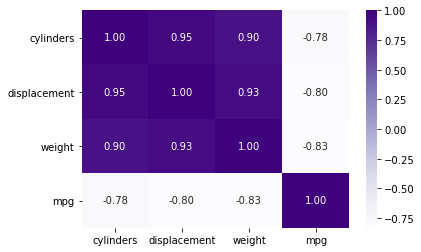

In [8]:
sns.heatmap(df.corr(),annot=True,fmt='0.2f',cmap='Purples');

we can see all the features are highly correlated with mpg

### Preprocessing

let's split the data into features and training target

In [9]:
X = df[['cylinders','displacement','weight']]  
y = df['mpg']

In [10]:
X

cylinders  displacement  weight
0            8         307.0  3504.0
1            8         350.0  3693.0
2            8         318.0  3436.0
3            8         304.0  3433.0
4            8         302.0  3449.0
..         ...           ...     ...
393          4         140.0  2790.0
394          4          97.0  2130.0
395          4         135.0  2295.0
396          4         120.0  2625.0
397          4         119.0  2720.0

[398 rows x 3 columns]

In [11]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

#### Split data into training and testing sets

Let's keep 20% for testing and rest for training. Note - use random_state=0 in order to reproduce results

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model training

Using sklearn, create a Linear Regression model (Fit on training data)

In [13]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Coefficient & Intercept Calculation

In [14]:
print("Coefficients ->", model.coef_)

Coefficients -> [-0.16426671 -0.01523978 -0.00555366]


- Separate coefficients for each feature (stored in coeff_) and one intercept (stored in intercept_)
- Positive coefficients — mpg increase as feature value increases
- Negative coefficients — mpg decreases as feature value increases
- close to zero - these apparently have little to no affect on charges

In [15]:
for i, name in enumerate(X.columns):
    print(f'{name:>10}: {model.coef_[i]}')  

 cylinders: -0.1642667076234922
displacement: -0.015239784069308301
    weight: -0.005553659569658795


In [16]:
print("Intercept ->", model.intercept_)

Intercept -> 43.851232953680864


### Evaluation: Calculate [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) and [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

##### On training data

In [17]:
y_pred_train = model.predict(x_train)
mean_squared_error(y_pred_train, y_train)

18.940698131690194

In [18]:
r2_score(y_pred_train, y_train)

0.54186524015868

##### On testing data

In [19]:
y_pred_test = model.predict(x_test)
mean_squared_error(y_pred_test, y_test)

16.23057377005805

In [20]:
r2_score(y_pred_test, y_test)

0.6254199817205301

Recall that R<sup>2</sup> score ranges from 0 - 1  where 
- 1 indicates that the estimator perfectly predicts the depend variable's value, given the independent variables' values
- 0 indicates that th emodel cannot make predictions with any accuracy, given independt variables' values


### Plot results

let's visualize `mpg` vs `weight`, fitted line, and residuals

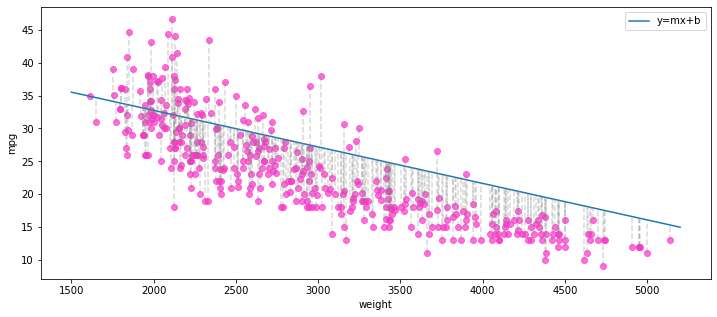

In [21]:
xs=np.linspace(1500,5200)
bO=model.intercept_
b1=model.coef_[-1]
ys= bO + (b1 * xs)

fig, ax = plt.subplots(figsize=(12,5))
ax.scatter(X.weight, y, c='#ff33cc', alpha=0.7)
ax.plot(xs,ys, label='y=mx+b')
for x_i, y_i in zip(X.weight, y):
    ax.plot([x_i, x_i],[y_i, b1*x_i+bO], c='gray', linestyle='dashed',alpha=0.3)
    ax.set_xlabel('weight')
    ax.set_ylabel('mpg')
    plt.legend()

`residuals` are the distance between our predicted value and actual value

##### Draw a scatterplot for both training and testing data to visualize how the prediction line looks

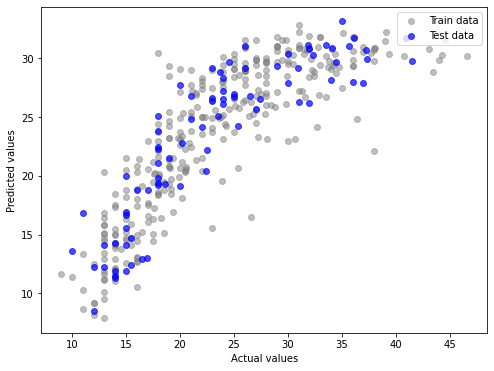

In [22]:
plt.figure(figsize=(8,6))

plt.scatter(y_train, y_pred_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')

plt.scatter(y_test, y_pred_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc = 'upper right')

The ideal case would be a straight line. The actual vs predicted plot appears quasi linear suggesting that there is plenty of room for improvement in the model

## How could we use our model to predict mpg for new car data?

In [23]:
# Let's say we have a car with 8 cylinder engine, 307 displacement, and weighs 3504 

new_car_data = np.array([8, 307, 3504]).reshape(1,-1)

# note that we need to reshape the array to make the shape compatible with the model

In [24]:
# Let's do the prediction. Don't forget to take the antilog of the prediction since our model transformed the charges to log(charges) earlier in our processing
prediction = model.predict(new_car_data)
prediction[0]

18.39846245133086

So the predicted mpg would be: ~ 18.4

## Assumptions for linear regression

These are the assumptions for a linear regression model:

- **linearity**: relationship between X and Y is linear (check w/ scatter plot)
- **multicolinearity**: columns of X should be independent (look for high levels of correlation between features)
- **normality**: for any fixed value of X, Y is normally distributed (plot distribution)
- **homoscedasticity**: violated when the variance of your residuals isn't constant